In [15]:
import pandas as pd
import matplotlib.pyplot as plt
column_names = ["timestamp", "index", "utilization_gpu_pct", "mem_util", "memory_free_MiB", "memory_used_MiB", "temperature_gpu", "temperature_memory", "power_draw_W", "pcie_link_width_current"]

In [16]:
df = pd.read_csv("data/gpu_sm_pct_0.csv", header=None, names=column_names)
# Converting 'memory_used_MiB' from string to numeric
df['memory_used_MiB'] = pd.to_numeric(df['memory_used_MiB'])
df['index'] = pd.to_numeric(df['index'])

# Separating the data based on the 'index' column
df_0 = df[df['index'] == 0]
df_1 = df[df['index'] == 1]

ser0 = pd.Series(df_0['memory_used_MiB'])
df_ser0 = pd.DataFrame(ser0)
df_ser0['cdf'] = df_ser0.rank(method = 'average', pct = True)

ser1 = pd.Series(df_1['memory_used_MiB'])
df_ser1 = pd.DataFrame(ser1)
df_ser1['cdf'] = df_ser1.rank(method = 'average', pct = True)


<Figure size 1000x600 with 0 Axes>

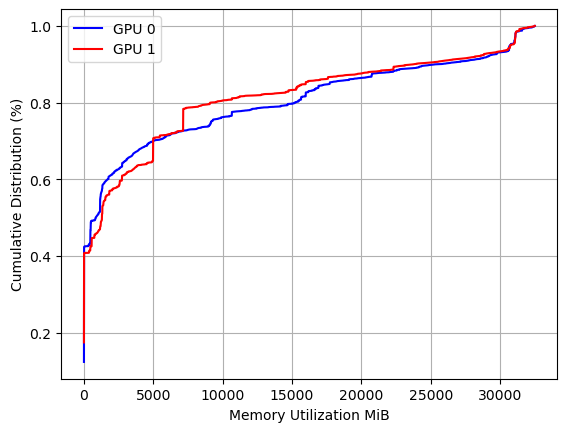

In [17]:
# Plotting both on the same figure
plt.figure(figsize=(10, 6))

# Plot for ser0
ax = df_ser0.sort_values('memory_used_MiB').plot(
    x='memory_used_MiB', 
    y='cdf', 
    grid=True, 
    legend=True, 
    color='blue',
    label='GPU 0'
)

# Plot for ser1 on the same axis
df_ser1.sort_values('memory_used_MiB').plot(
    x='memory_used_MiB', 
    y='cdf', 
    grid=True, 
    legend=True, 
    color='red',
    label='GPU 1',
    ax=ax  # This ensures that the plot is on the same axes
)

# Setting the labels
ax.set_xlabel('Memory Utilization MiB')
ax.set_ylabel('Cumulative Distribution (%)')

# Show the plot with both series
plt.show()

In [18]:
max(df['memory_used_MiB'])

32509.0